In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
np.seterr(all = 'ignore')

# Using the dataset from the Perceptron Demo
def load_data1zeroone(): # Initialize dataset 1 using 0 1 classification
    URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    data = pd.read_csv(URL_, header = None)
    data = data[:100]
    data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 0, 1)
    #data = np.asmatrix(data, dtype = 'float64')
    data = data.to_numpy()
    #print(data)
    features = np.insert(data[:, :-1],0,1,axis=1) # adds bias term (b)
    labels = data[:, -1].flatten()
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=15)
    return X_train, X_test, y_train, y_test
def load_data2zeroone(): # Initialize dataset 2 using 0 1 classification
    data = datasets.load_breast_cancer()
    features = np.insert(data.data,0,1,axis=1) # adds bias term (b)
    X_train, X_test, y_train, y_test = train_test_split(features, data.target, test_size=0.2, random_state=15)
    return X_train, X_test, y_train, y_test
def load_data1negpos(): # Initialize dataset 1 using -1 1 classification
    URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    data = pd.read_csv(URL_, header = None)
    data = data[:100]
    data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', -1, 1)
    #data = np.asmatrix(data, dtype = 'float64')
    data = data.to_numpy()
    #print(data)
    features = np.insert(data[:, :-1],0,1,axis=1) # adds bias term (b)
    labels = data[:, -1].flatten()
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=15)
    return X_train, X_test, y_train, y_test
def load_data2negpos(): # Initialize dataset 2 using -1 1 classification
    data = datasets.load_breast_cancer()
    features = np.insert(data.data,0,1,axis=1) # adds bias term (b)
    target = np.where(data.target==0,-1,1)
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=15)
    return X_train, X_test, y_train, y_test
def load_data3():
    data = pd.read_excel('Raisin_Dataset.xlsx')
    data[4] = np.where(data.iloc[:, -1]=='Kecimen', 0, 1)
    #data = np.asmatrix(data, dtype = 'float64')
    data = data.to_numpy()
    data = np.delete(data,7,1)
    features = np.insert(data[:, :-1],0,1,axis=1) # adds bias term (b)
    labels = data[:, -1].flatten()
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=15)
    return X_train, X_test, y_train, y_test

In [2]:
class LogisticRegressionzeroone: # Performing Logistic Regression using 0 1 formula
    def __init__(self, max_iters=100, learning_rate=0.001, epsilon=1e-5, lam=0.01):
        self.max_iters = max_iters
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.lam = lam
        self.w = None

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        m = X.size
        loss, i = 0, 0
        epoch_list, recorded_loss = [], []
        while True:
            if (i > 0):
                recorded_loss.append(loss)
                epoch_list.append(i)
            #print(np.dot(X, self.w))
            model_prediction_vector = (1 / (1 + np.exp(-1 * np.dot(X, self.w)))) + 1e-15
            #print(y.T)
            #new_loss = (-1/m)*np.sum(np.dot(y.T, np.log(model_prediction_vector)) + np.dot((1-y.T),np.log(1-model_prediction_vector))) + (self.lam/2)*np.sum(np.power(self.w, 2))
            #new_loss = (-1/m)*np.sum(1 + np.exp(-1 * np.dot(y.T, model_prediction_vector))) + (self.lam/2)*np.sum(np.power(self.w, 2))
############new_loss = np.log(1+np.exp(-1 * np.dot(y, model_prediction_vector))) + ((self.lam/2) * np.sum(self.w ** 2))
            #new_loss = (1 / m) * ((-1 * np.dot(y.T,np.log(model_prediction_vector))) - np.dot(1-y.T,np.log(1-model_prediction_vector))) + ((self.w/(2*m)) *np.sum(self.w**2))
    #new_loss = (1/m) * np.matmul(-y.T, np.log(model_prediction_vector)) - np.matmul((1 -y.T), np.log(1 - model_prediction_vector)) + ((self.lam/(2*m))*np.sum(np.power(self.w, 2)))
        #new_loss = (1/m) * np.matmul(-y.T, np.log(model_prediction_vector)) - np.matmul((1 -y.T), np.log(1 - model_prediction_vector))
            new_loss = -np.sum(np.dot(np.log(model_prediction_vector), y) + np.dot((1 - y), np.log(1 - model_prediction_vector)))/m  + ((self.lam/2) * np.sum(self.w ** 2))
            #gradient = np.dot(X.transpose(), model_prediction_vector - y) - (2*self.lam*self.w)
            #gradient = np.dot(X.T, np.dot(y, (-1 * np.exp(-1 * np.dot(y, model_prediction_vector))) / (1 + np.exp(-1 * np.dot(y, model_prediction_vector))))) + ((self.lam/m) * self.w)
            #gradient = (1/m) * np.dot(X.T, np.dot(y, (-1 * np.exp(-1 * np.dot(y, model_prediction_vector))) / (1 + np.exp(-1 * np.dot(y, model_prediction_vector))))) + ((self.lam) * self.w)
###########gradient = np.dot(X.T, (model_prediction_vector - y)) + (2*self.lam*self.w)
            #gradient = (-1 * np.exp(-1 * np.dot(y, model_prediction_vector))) / (1 + np.exp(-1 * np.dot(y, model_prediction_vector)))
            gradient = (1/m) * np.dot(X.T, (model_prediction_vector - y)) + np.sum(self.lam*self.w)
        #gradient = (1/m) * np.dot(X.T, (model_prediction_vector - y))
            #print((1/m) * np.dot(X.T, (model_prediction_vector - y)))
            #print("WITH",(1/m) * np.dot(X.T, (model_prediction_vector - y)) + (self.lam*self.w))
            #print("VAL", (self.lam*self.w))
            #print((self.lam*self.w/m))
            #print("ACTUAL",y)
            #print("PREDICTED", model_prediction_vector)
            #if (i%500==0):
            #    print("ACTUAL",y)
            #    print("PREDICTED", model_prediction_vector)
            #    print("EXTRAAAAA", gradient)
            self.w -= self.learning_rate * gradient
            if (abs(new_loss - loss) <= self.epsilon): # additional convergence condition
                #print(new_loss, loss)
                #print("L(wt+1,bt+1)-L(wt,bt) < eps.")
                #print("Exited at the " + str(i) + "th iteration.")
                break
            elif (i >= self.max_iters):
                #print("Max iterations reached.")
                #print("Exited at the " + str(i) + "th iteration.")
                break
            else:
                loss = new_loss
                i+=1
        return recorded_loss, epoch_list

    def predict(self, X):
        model_prediction_vector = 1 / (1 + np.exp(-1 * np.dot(X, self.w)))
        classification_vector = []
        for x in model_prediction_vector:
            if (x >= 0.5):
                classification_vector.append(1)
            else:
                classification_vector.append(0)
        return classification_vector

In [3]:
class LogisticRegressionnegpos: # Performing Logistic Regression using -1 1 formula
    def __init__(self, max_iters=100, learning_rate=0.001, epsilon=1e-5, lam=0.01):
        self.max_iters = max_iters
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.lam = lam
        self.w = None

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        m = X.size
        loss, i = 0, 0
        epoch_list, recorded_loss = [], []
        while True:
            if (i > 0):
                recorded_loss.append(loss)
                epoch_list.append(i)
            model_prediction_vector = (1 / (1 + np.exp(-1 * np.matmul(X, self.w))))
            new_loss = np.log(1+np.exp(np.dot(y,model_prediction_vector))) + ((self.lam/2) * np.sum(self.w ** 2))
            #gradient = np.dot(X.T, np.dot(y,(-1 * np.exp(-1 * np.dot(y, model_prediction_vector))) / (1 + -1 * np.exp(-1 * np.dot(y, model_prediction_vector)))))
            gradient = -1*np.dot(X.T,((y+1)/2)-model_prediction_vector) + np.sum(self.lam*self.w/m)
            self.w -= self.learning_rate * gradient
            if (abs(new_loss - loss) < self.epsilon): # additional convergence condition
                #print(new_loss, loss)
                #print("L(wt+1,bt+1)-L(wt,bt) < eps.")
                #print("Exited at the " + str(i) + "th iteration.")
                break
            elif (i >= self.max_iters):
                #print("Max iterations reached.")
                #print("Exited at the " + str(i) + "th iteration.")
                break
            else:
                loss = new_loss
                i+=1
        return recorded_loss, epoch_list

    def predict(self, X):
        model_prediction_vector = 1 / (1 + np.exp(-1 * np.dot(X, self.w)))
        classification_vector = []
        for x in model_prediction_vector:
            if (x >= 0.5):
                classification_vector.append(1)
            else:
                classification_vector.append(-1)
        return classification_vector

In [4]:
# Create train and test split for dataset 1 with 0 1 target
X_train, X_test, y_train, y_test = load_data1zeroone()

# Performing Logistic Regression with 0 regularization
regressor = LogisticRegressionzeroone(max_iters=1000, learning_rate=.01, epsilon=1e-5, lam=0)
recorded_loss, epoch_list = regressor.fit(X_train, y_train)
print("Train accuracy:", accuracy_score(y_train, regressor.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, regressor.predict(X_test)))

Train accuracy: 1.0
Test accuracy: 1.0


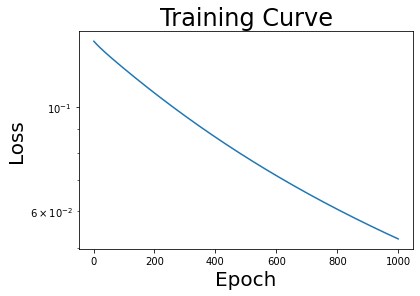

In [5]:
# Plotting the Loss over Epochs for the above model
def plot_loss(epoch_list, recorded_loss):
    plt.plot(epoch_list, recorded_loss)
    ax = plt.gca()
    ax.set_yscale("log")
    ax.set_title("Training Curve", fontsize = 24)
    ax.set_xlabel("Epoch", fontsize = 20)
    ax.set_ylabel("Loss", fontsize = 20)
plot_loss(epoch_list, recorded_loss)

In [6]:
# I am not overfitting or underfitting the data
# Trying to overfit dataset 1 with 0 1 target
X_train, X_test, y_train, y_test = load_data1zeroone()
poly = PolynomialFeatures(22)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)
# Performing Logistic Regression with 0 regularization
regressor = LogisticRegressionzeroone(max_iters=1000, learning_rate=.001, epsilon=1e-5, lam=0)
recorded_loss, epoch_list = regressor.fit(X_train, y_train)
print("Train accuracy:", accuracy_score(y_train, regressor.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, regressor.predict(X_test)))

Train accuracy: 0.4875
Test accuracy: 0.55


In [7]:
# I'm only able to underfit the data, so regularization wouldn't help as it is an overfitting remedy
# Let's try again with the -1 1 formula used in class
# Create train and test split for dataset 1 with -1 1 target
X_train, X_test, y_train, y_test = load_data1negpos()

# Performing Logistic Regression with 0 regularization
regressor = LogisticRegressionnegpos(max_iters=1000, learning_rate=.01, epsilon=1e-5, lam=0)
recorded_loss, epoch_list = regressor.fit(X_train, y_train)
print("Train accuracy:", accuracy_score(y_train, regressor.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, regressor.predict(X_test)))

Train accuracy: 1.0
Test accuracy: 1.0


In [8]:
# Again, I am not overfitting or underfitting the data
# Trying to overfit dataset 1 with -1 1 target
X_train, X_test, y_train, y_test = load_data1negpos()
poly = PolynomialFeatures(9)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)
# Performing Logistic Regression with 0 regularization
regressor = LogisticRegressionnegpos(max_iters=1000, learning_rate=.001, epsilon=1e-5, lam=0)
recorded_loss, epoch_list = regressor.fit(X_train, y_train)
print("Train accuracy:", accuracy_score(y_train, regressor.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, regressor.predict(X_test)))

Train accuracy: 0.9875
Test accuracy: 0.95


In [9]:
# It seems like I'm able to overfit the data
# Performing Logistic Regression with regularization at lambda = 0.1
regressor = LogisticRegressionnegpos(max_iters=1000, learning_rate=.001, epsilon=1e-5, lam=0.1)
recorded_loss, epoch_list = regressor.fit(X_train, y_train)
print("Train accuracy:", accuracy_score(y_train, regressor.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, regressor.predict(X_test)))

Train accuracy: 1.0
Test accuracy: 1.0


In [10]:
# Regularization increased the test and training accuracy
# It looks like I was able to reduce the overfitting with regularization!
# Let's try our model with another dataset to see if the model was very biased to dataset 1
# Create train and test split for dataset 2 with 0 1 target
X_train, X_test, y_train, y_test = load_data2zeroone()
# Performing Logistic Regression with 0 regularization
regressor = LogisticRegressionzeroone(max_iters=1000, learning_rate=.01, epsilon=1e-5, lam=0)
recorded_loss, epoch_list = regressor.fit(X_train, y_train)
print("Train accuracy:", accuracy_score(y_train, regressor.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, regressor.predict(X_test)))

Train accuracy: 0.9120879120879121
Test accuracy: 0.8508771929824561


In [11]:
# It looks like the model overfits on the dataset
# Performing Logistic Regression with regularization at lambda = 0.1
regressor = LogisticRegressionzeroone(max_iters=1000, learning_rate=.01, epsilon=1e-5, lam=0.1)
recorded_loss, epoch_list = regressor.fit(X_train, y_train)
print("Train accuracy:", accuracy_score(y_train, regressor.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, regressor.predict(X_test)))

Train accuracy: 0.9230769230769231
Test accuracy: 0.8947368421052632


In [12]:
# Regularization increased the test and training accuracy
# It looks like I was able to reduce the overfitting with regularization!
# Create train and test split for dataset 2 with -1 1 target
X_train, X_test, y_train, y_test = load_data2negpos()
# Performing Logistic Regression with 0 regularization
regressor = LogisticRegressionnegpos(max_iters=1000, learning_rate=.01, epsilon=1e-5, lam=0)
recorded_loss, epoch_list = regressor.fit(X_train, y_train)
print("Train accuracy:", accuracy_score(y_train, regressor.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, regressor.predict(X_test)))

Train accuracy: 0.6197802197802198
Test accuracy: 0.6578947368421053


In [13]:
# It looks like the model underfits on the data
# Trying to overfit dataset 2 with -1 1 target
X_train, X_test, y_train, y_test = load_data2negpos()
poly = PolynomialFeatures(3)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)
# Performing Logistic Regression with 0 regularization
regressor = LogisticRegressionnegpos(max_iters=1000, learning_rate=.01, epsilon=1e-5, lam=0)
recorded_loss, epoch_list = regressor.fit(X_train, y_train)
print("Train accuracy:", accuracy_score(y_train, regressor.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, regressor.predict(X_test)))

Train accuracy: 0.3802197802197802
Test accuracy: 0.34210526315789475


In [14]:
# It seems like I'm able to overfit the data
# Performing Logistic Regression with regularization at lambda = 9
regressor = LogisticRegressionnegpos(max_iters=1000, learning_rate=.01, epsilon=1e-5, lam=9)
recorded_loss, epoch_list = regressor.fit(X_train, y_train)
print("Train accuracy:", accuracy_score(y_train, regressor.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, regressor.predict(X_test)))

Train accuracy: 0.9208791208791208
Test accuracy: 0.8508771929824561


In [15]:
# The training accuracy and test accuracy have both increased, but the model is still overfitting